In [2]:
#Import environment and libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#Load CSV File as Pandas DataFrame & Preview DF
df = pd.read_csv(Path('./YOY_2122_combined_csv.csv'))
df.head()

,Primary_Key_2021_2022,School_Name,Grade_Test_Type,Mastery_Level,Baseline_Year,Compared_Year,YOY_State_2022,YOY_Region_2022,YOY_District_2022,YOY_African_American_2022,YoY_Hispanic_2022,YoY_White_2022,YoY_Econ_Disadv_2022,YoY_ELL_2022
0,Aldine_ISD_Grade 3 Mathematics_At Approaches G...,Aldine_ISD,Grade 3 Mathematics,At Approaches Grade Level or Above,2021,2022,0.09,0.09,0.15,0.14,0.14,0.32,0.15,0.15
1,Aldine_ISD_Grade 3 Mathematics_At Masters Grad...,Aldine_ISD,Grade 3 Mathematics,At Masters Grade Level,2021,2022,0.07,0.07,0.04,0.04,0.04,0.04,0.05,0.04
2,Aldine_ISD_Grade 3 Mathematics_At Meets Grade ...,Aldine_ISD,Grade 3 Mathematics,At Meets Grade Level or Above,2021,2022,0.12,0.13,0.13,0.09,0.13,0.19,0.12,0.12
3,Aldine_ISD_Grade 3 Reading_At Approaches Grade...,Aldine_ISD,Grade 3 Reading,At Approaches Grade Level or Above,2021,2022,0.09,0.08,0.17,0.16,0.18,0.13,0.17,0.17
4,Aldine_ISD_Grade 3 Reading_At Masters Grade Le...,Aldine_ISD,Grade 3 Reading,At Masters Grade Level,2021,2022,0.11,0.11,0.08,0.05,0.09,0.09,0.09,0.07


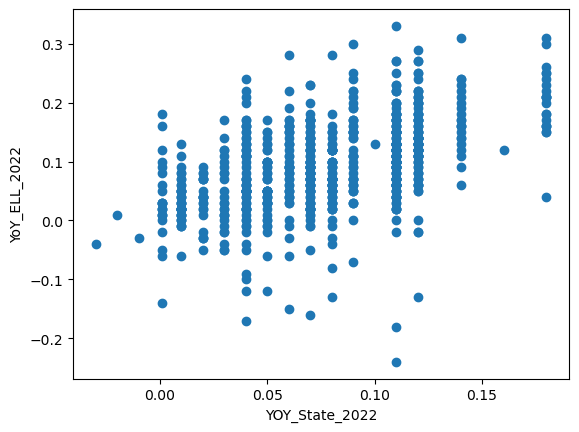

In [4]:
#Inspect relationship between state scores & ELL scores
plt.scatter(df.YOY_State_2022, df.YoY_ELL_2022)
plt.xlabel('YOY_State_2022')
plt.ylabel('YoY_ELL_2022')
plt.show()

In [5]:
#Format data to meet requirements of Scikit-learn library
X = df.YOY_State_2022.values.reshape(-1, 1)

In [6]:
#Examine first five entries in X
X[:5]

array([[0.09],
       [0.07],
       [0.12],
       [0.09],
       [0.11]])

In [7]:
#Examine shape of X; 1506 samples, with a single feature (column)
X.shape

(743, 1)

In [8]:
#Assign target variable, or ELL column, to y
y = df.YoY_ELL_2022

In [9]:
#Create instance of the linear regression model. Instantiation means that LinearRegression class is like a template that contains the algorithms required to perform linear regression. From this template, a specific object called model is created that will analyze the data and store info specific to dataset.
model = LinearRegression()

In [10]:
#Fit/Train Model, meaning analyze data and attempt to learn patterns
model.fit(X, y)

LinearRegression()

In [11]:
#Use predict methos to generate predictions, given the district that a student is in, model will predict ELL scores.
y_pred = model.predict(X)
print(y_pred.shape)

(743,)


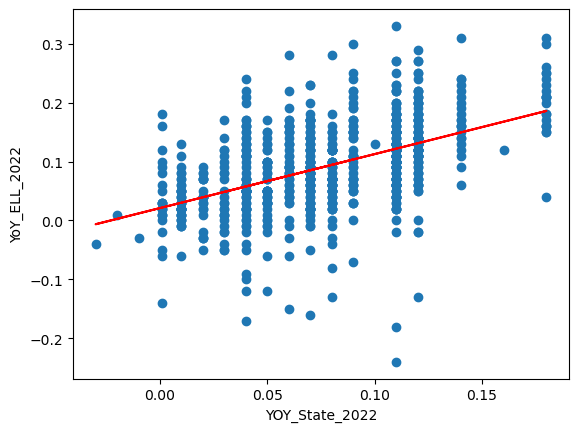

In [12]:
#Plot predictions with a red line against the data points
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('YOY_State_2022')
plt.ylabel('YoY_ELL_2022')
plt.show()

In [13]:
print(model.coef_)
print(model.intercept_)

[0.91577583]
0.021014075680160837
